# REGRESSION LINÉAIRE

Dans un premier temps, nous importerons tout ce qui est nécessaire pour la suite du compte rendu.

In [ ]:
#importation des bibliothèques nécéssaire
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1bNcCWnes2lc_a1DWGSutiIaGWnzV4KYU?usp=drive_link

Retrieving folder list
Processing file 106yfjx7__2MHI02wA_L_o84o9pbIRWiP area.csv
Processing file 1hzl4LquPYuO30c9TzBNKMSItWeMp4lZa bacc_toamasina2023.csv
Retrieving folder 1TXXahH-Ra88jD7C4IIJ-wq0V5eL3_RJZ datapropre
Processing file 1tzUTK32rUf-7tR7ch2E-THs_vacS8NCG areaPropre.csv
Processing file 1VE3YLB9U55pwfELAYJOHXoRMrUtnMC61 pamgoldingPropre.csv
Processing file 1MUf93J_XIFgKO6lUwx5QqT8VsexIxlmw rawsonPropre.csv
Processing file 1Ske0gwe_lKBKkNqLHKq855F7lJibmz8q remaxPropre.csv
Processing file 1Xfj34kKCetqPNISzCVcQAyiaPS-l1SHY sahometradersPropre.csv
Processing file 1AYnUN1kYGzhr7xbFfwER4N7AunuFml8f trovit.csv
Processing file 1BOh_LNDBRRKTq4nI3BByr-dmA2Ke4boB full_grouped.csv
Processing file 1Tdz90A4fyW_ulXsNvnmBNoa1Cm7lbqjX midi_actu.csv
Processing file 1XD-m_s_PysHc47u2L-nLmTiA-_YJXKzd moov_actu.csv
Processing file 1Qd0ieF_tlctDv2ueGwTq4s9v-pEwtQS5 orange_actu.csv
Processing file 1-es_VD-NEUHLmHAKNPVylRond2aRFFzK pamgolding.csv
Processing file 1WoPBUNv-pSvBzVOuukZiXeBH37ctCl1q pr

Prenons des données afin de tester notre régression linéaire.

## DATASET

In [ ]:
data=pd.read_csv('data/trovit.csv')


In [ ]:
df=data.copy()

In [ ]:
df.head(2)

,Description,Price,Bedrooms,Bathrooms,Size,Type,City,Region,Address
0,Residential For Sale House Buffalo City Metrop...,650000.0,3.0,1.0,NaN,Homes,East London,Eastern Cape,Eastern Cape
1,Residential For Sale Townhouse Port ElizabethE...,2200000.0,3.0,3.0,NaN,Homes,nelson mandela bay,Nelson Mandela Bay,Nelson Mandela Bay


In [ ]:
x = df.dropna().drop(columns="Price").select_dtypes(np.number)
y = df.dropna().Price

## Linéaire Regression

In [ ]:
class LinearRegression:
    def __init__(self,intercept:bool):
        self.intercept= intercept
    def train (self, X,y):

        if self.intercept:
            X = np.hstack((X,np.ones((X.shape[0], 1))))
        self.theta = (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

    def predict(self,X):
        if self.intercept:
            X = np.hstack((X,np.ones((X.shape[0], 1))))
        y=X.dot(self.theta)
        return y


In [ ]:
linreg = LinearRegression(True)

In [ ]:
linreg.train(x,y)

In [ ]:
linreg.predict(x)

array([  822026.61129997,  1893178.38040486,  4127231.83241083,
        1953585.98474173,  3707734.58007146,   684431.51253266,
        1414412.03101951,   893610.8850569 ,  2756259.51234942,
        3846438.41420269,  1993857.72096631,  1946874.0287043 ,
        1785787.08380598,  1836126.7540867 ,   933882.62128147,
        1993857.72096631,  2641047.5243492 ,  1877507.2256752 ,
        4805653.34642032,  1946874.0287043 ,  1089366.34550627,
        2665053.32470929,  2854721.38218304,  4987470.94056576,
        2511787.07121232,  2775286.6450978 ,  2842406.2054721 ,
        2010637.61105988,  1807031.68728218,  1860727.33558162,
         809711.43458902,  1897643.09378749,  2256732.74178998,
        3278683.34790504,  1839482.73210542,  2997889.9296969 ,
        1671683.83116967,  2552058.8074369 ,  1792499.03984341,
        1975969.09550882,  3367047.51175554,  2629870.85492914,
        2128721.39477671,  2708167.0847235 ,  4114916.65569988,
        6681806.71269346,  7017404.51456

In [ ]:
linreg.theta

array([-222603.2845991 ,  869793.08798199,    3355.97801871,
        250885.79505663])

## Rigde

In [ ]:
class Ridge:
    def __init__(self,intercept:bool,alpha):
        self.intercept= intercept
        self.alpha = alpha
    def train (self, X,y):

        if self.intercept:
            X = np.hstack((X,np.ones((X.shape[0], 1))))
        self.theta = (np.linalg.inv(X.T.dot(X)+ self.alpha * np.identity(X.shape[1]))).dot(X.T).dot(y)

    def predict(self,X):
        if self.intercept:
            X = np.hstack((X,np.ones((X.shape[0], 1))))
        y=X.dot(self.theta)
        return y

In [ ]:
linreg1 = Ridge(True,2)

In [ ]:
linreg1.train(x,y)

In [ ]:
linreg1.predict(x)

array([  825497.1247673 ,  1892761.90464304,  4127428.01834257,
        1953232.58804843,  3707492.71691623,   687758.34589945,
        1421786.44865125,   893010.73219265,  2751738.77501132,
        3842195.9725698 ,  1993546.37698536,  1946513.62322561,
        1785258.4674779 ,  1835650.70364906,   933324.52112958,
        1993546.37698536,  2640551.89623762,  1872928.96937172,
        4807418.05159756,  1946513.62322561,  1084825.18884021,
        2665442.85926752,  2858594.29378218,  4984419.99244946,
        2507871.14512835,  2774931.19269405,  2842120.84092227,
        2010343.78904242,  1802379.83873209,  1856131.55731467,
         809023.67190738,  1893085.86384018,  2252550.48186113,
        3278853.55440567,  1839010.18606047,  2993621.50863289,
        1671036.06548993,  2548184.93406528,  1791977.43230072,
        1979784.48814258,  3363164.57388808,  2633508.97221766,
        2135981.61613172,  2707741.54446584,  4110954.56548266,
        6673799.32854757,  7009747.56968

In [ ]:
linreg1.theta

array([-218690.31593884,  865695.8351911 ,    3359.48241141,
        246329.17213754])

## PLOT

In [ ]:
def plot(p):

    arr=[]
    for x in p:
        if x >= 1:
            while x/10>=1:
                x = x/10
        elif x ==0:
            pass
        elif x<1:
            while x<1:
                x = x*10
        arr.append(int(x))
    pd.Series(arr).value_counts().plot.bar()

# SITE TROVIT

In [ ]:
data=pd.read_csv('data/trovit.csv')

In [ ]:
df=data.copy()

In [ ]:
df.head(2)

,Description,Price,Bedrooms,Bathrooms,Size,Type,City,Region,Address
0,Residential For Sale House Buffalo City Metrop...,650000.0,3.0,1.0,NaN,Homes,East London,Eastern Cape,Eastern Cape
1,Residential For Sale Townhouse Port ElizabethE...,2200000.0,3.0,3.0,NaN,Homes,nelson mandela bay,Nelson Mandela Bay,Nelson Mandela Bay


In [ ]:
df['Price'].dtype

dtype('float64')

In [ ]:
df = df.dropna(subset=['Price'])

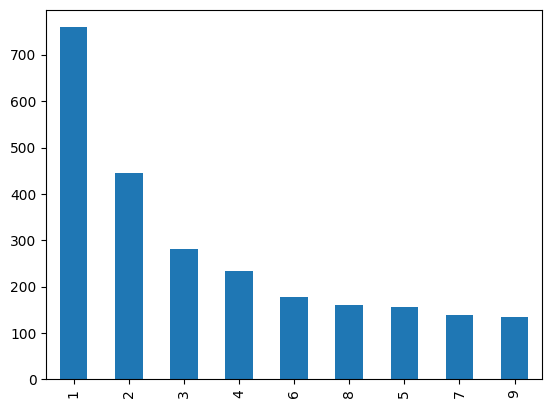

In [ ]:
plot(df['Price'])

# SITE AREA

In [ ]:
data=pd.read_csv('data/area.csv')
import re

In [ ]:
df1=data.copy()

In [ ]:
df1.head(2)


,Title,Price,Usps,Addresse,Sale,bedroom,bathroom,garage
0,4 Bed Duplex in Camps Bay,R 19 250 000,"Pool, Furnished and Study.",Unit 1 Little Glen Views 38 Upper Tree Rd,NaN,4.0,4.5,2.0
1,3 Bed Penthouse in Camps Bay,R 19 900 000,"Alarm, Pool and Access Gate.",202 Ebb Tide 143 Victoria Road,NaN,3.0,3.5,NaN


In [ ]:
df1['Price'].dtype

dtype('O')

In [ ]:
#nettoyage de données
def process(x):

  x=re.sub("\D","",x)
  if x=="":
   return np.nan
  else:
    return float(x)
df1['Price']=df1['Price'].apply(process)

In [ ]:
df1 = df1.dropna(subset=['Price'])

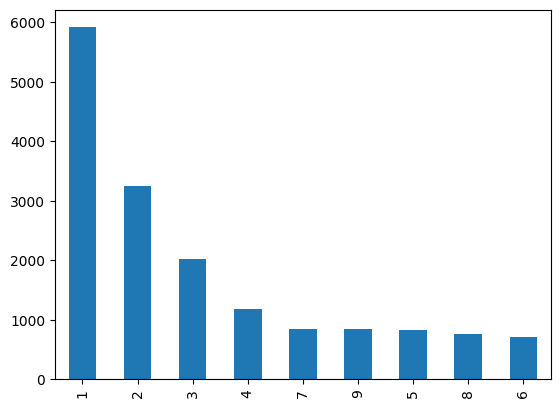

In [ ]:
plot(df1['Price'])

# SITE PAMGOLDING

In [ ]:
data=pd.read_csv('data/pamgolding.csv')
import re

In [ ]:
df2=data.copy()

In [ ]:
df2.head(2)

,Title,Price,Ref,Erf size:,Land usage:,Energy Supplies:,Water:,Rates and Taxes:,Levies:,Salaries:,Building size:,Insurance:,Operating Costs:,Turnover:,Sewer:,Floor plans,Security:,Special Levies:,CSOS:,Dustbin:
0,5-star lodge for sale in Thornybush,"R337,078,652",1HS1625384,222.58 ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,448.82 hectare fruit farm for sale in Makhado ...,"R80,000,000",1TA1594043,448.82 ha,Fruit,Eskom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2['Price'].dtype

dtype('O')

In [ ]:
#nettoyage de données
def process(x):

  x=re.sub("\D","",x)
  if x=="":
   return np.nan
  else:
    return float(x)
df2['Price']=df2['Price'].apply(process)

In [ ]:
df2= df2.dropna(subset=['Price'])

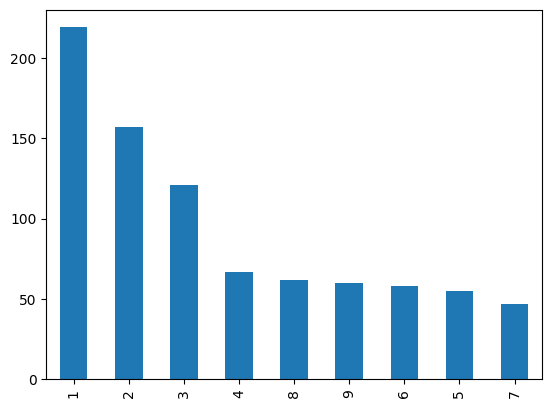

In [ ]:
plot(df2['Price'])

# SITE PROPERTY

In [ ]:
data=pd.read_csv('data/property.csv')
import re

In [ ]:
df3=data.copy()

In [ ]:
df3.head(2)

,uid,region,city,property_type,price,bedrooms,bathrooms,size
0,1f1b8A1v1skf655345d5c3f3e,Eastern Cape,East London,Homes,650000.0,3.0,1.0,NaN
1,1c61t1zGV1H1A655345d5c454c,Nelson Mandela Bay,nelson mandela bay,Homes,2200000.0,3.0,3.0,NaN


In [ ]:
df3['price'].dtype

dtype('float64')

In [ ]:
df3= df3.dropna(subset=['price'])

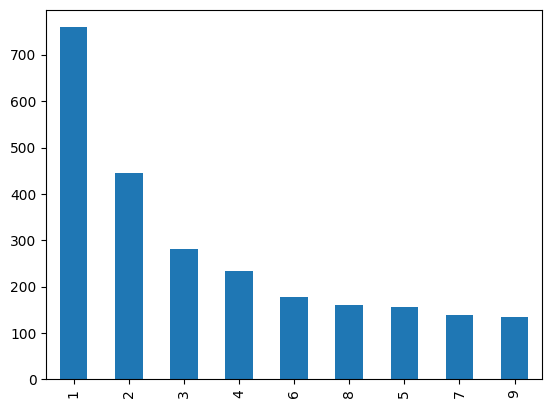

In [ ]:
plot(df3['price'])


# SITE RAWSON

In [ ]:
data=pd.read_csv('data/rawson.csv')
import re

In [ ]:
df4=data.copy()

In [ ]:
df4.head(2)

,Title,Price,Address,Description,Bedrooms,Bathrooms,Garage,Size
0,4 Bedroom House in Seemeeupark,R695 000,1 Farrar Street,"Presenting this solid, spacious, affordable ho...",4,1.0,2,2171m2
1,4 Bedroom Townhouse in Dagbreek,R998 000,1 Farrar Street,Modern and open plan living at its best! This ...,4,1.5,2,2171m2


In [ ]:
df4['Price'].dtype

dtype('O')

In [ ]:
#nettoyage de données
def process(x):

  x=re.sub("\D","",x)
  if x=="":
   return np.nan
  else:
    return float(x)
df4['Price']=df4['Price'].apply(process)

In [ ]:
df4= df4.dropna(subset=['Price'])

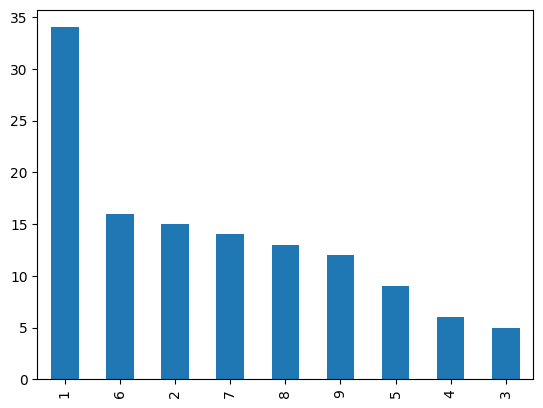

In [ ]:
plot(df4['Price'])

# SITE REMAX

In [ ]:
data=pd.read_csv('data/remax.csv')
import re

In [ ]:
df5=data.copy()

In [ ]:
df5.head(2)

,Title,Price,Address,Description,Bedrooms,Bathrooms,Garage,Size
0,4 Bedroom House in Seemeeupark,R695 000,1 Farrar Street,"Presenting this solid, spacious, affordable ho...",4,1.0,2,2171m2
1,4 Bedroom Townhouse in Dagbreek,R998 000,1 Farrar Street,Modern and open plan living at its best! This ...,4,1.5,2,2171m2


In [ ]:
df5['Price'].dtype

dtype('O')

In [ ]:
#nettoyage de données
def process(x):

  x=re.sub("\D","",x)
  if x=="":
   return np.nan
  else:
    return float(x)
df5['Price']=df5['Price'].apply(process)

In [ ]:
df5= df5.dropna(subset=['Price'])

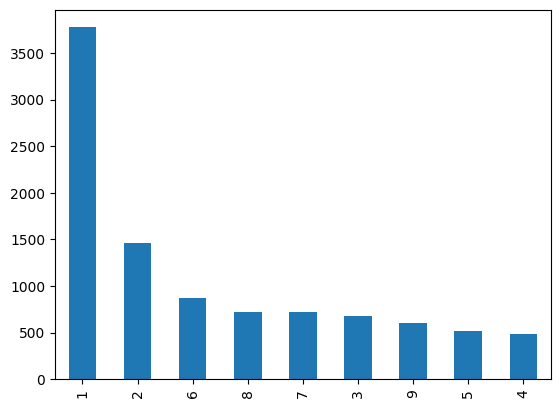

In [ ]:
plot(df5['Price'])

# SITE  SAHOMETRADERS

In [ ]:
data=pd.read_csv('data/sahometraders.csv')
import re

In [ ]:
df6=data.copy()

In [ ]:
df6.head(2)

,Page number,Title,Price,Location,Addresse,Description,Bedrooms,Bathrooms,Parking,Floor Size,Erf Size
0,1,NaN,R 2 600 000,Waterlake Farm Lifestyle Estate,"Boschkop AH\r\nWaterlake Farm Estate, Waterlak...",A new upmarket modern lifestyle exclusive deve...,4.0,3.0,3.0,261 m²,NaN
1,1,NaN,R 3 695 000,Bryanston,"26 Westminster Avenue, Bryanston, Sandton",Last homes available in this highly popular de...,4.0,4.0,NaN,NaN,NaN


In [ ]:
df6['Price'].dtype

dtype('O')

In [ ]:
#nettoyage de données
def process(x):

  x=re.sub("\D","",x)
  if x=="":
   return np.nan
  else:
    return float(x)
df6['Price']=df6['Price'].apply(process)

In [ ]:
df6= df6.dropna(subset=['Price'])

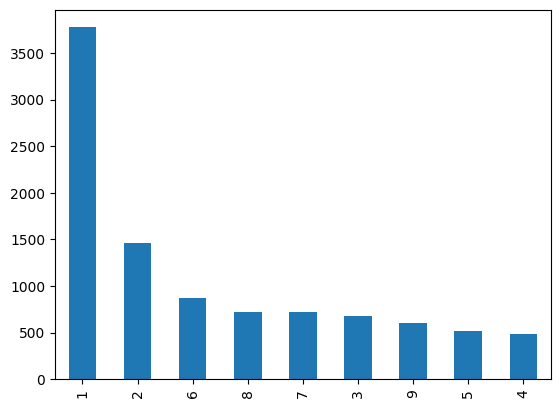

In [ ]:
plot(df6['Price'])nombre

 # DONNÉE DU COVID

In [ ]:
data=pd.read_csv('data/full_grouped.csv')

In [ ]:
df7=data.copy()

In [ ]:
df7.head(2)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
df7=df7.groupby("Country/Region").sum()

<ipython-input-191-4ab60e00839b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df7=df7.groupby("Country/Region").sum()


In [ ]:
df7= df7.dropna()

In [ ]:
df7.head(2)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
Afghanistan,1936390,49098,798240,1089052,36263,1269,25198
Albania,196702,5708,118877,72117,4880,144,2745


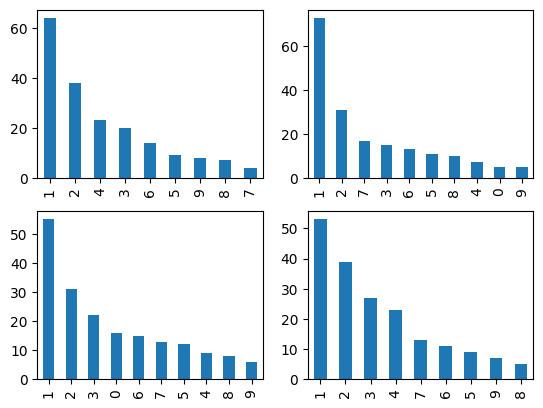

In [ ]:
i=1
for col in df7[['Confirmed','Recovered','Deaths','Active']]:
    plt.subplot(2,2, i)
    plot(df7[col])
    i += 1
plt.show()